### Import all the necessary Libraries for our EDA

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [27]:
import warnings
warnings.filterwarnings(action='ignore')

## Data Extraction
We take the raw data and extract data for analysis..

In [3]:
data = pd.read_csv("total_netflix_2023 new.csv")

#### head gives a first 5 datasets from this dataframe

In [4]:
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."


The report covers more than 18,000 titles and represent 99% of all viewing on Netflix and nearly 100 billion hours viewed.
The strength of returning favorites like Ginny & Georgia, Alice in Borderland, The Marked Heart, Outer Banks, You, Queen Charlotte.
A Bridgerton Story, XO Kitty so,they are popularity of new series like The Night Agent,The Diplomat, Beef, The Glory, Alpha Males, FUBAR and Fake Profile, 
which generate huge audiences and fandoms.The size of the audience of our films across every genre including The Mother, Luther be best.


#### help shape of columns and row are in this dataframe.

In [8]:
data.shape

(18332, 9)

#### The info method prints information about the dataFrame..

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                18332 non-null  object
 1   Available Globally?  18332 non-null  object
 2   Release Date         18332 non-null  object
 3   Hours Viewed         18332 non-null  object
 4   Number of Ratings    18332 non-null  object
 5   Rating               18332 non-null  object
 6   Genre                18332 non-null  object
 7   Key Words            18332 non-null  object
 8   Description          18332 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


#### The describe method are summary statistics for numerical columns in our DataFrame.

In [10]:
data.describe()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
count,18332,18332,18332,18332,18332,18332,18332,18332,18332
unique,18214,2,1667,587,2267,82,394,2337,1900
top,Perfect Strangers // Známi neznámi,No,0,0,11869.0,6.6,['Comedy'],0,0
freq,4,13798,3693,3693,500,735,1560,2973,141


#### use the name of columns in the dataframe

In [11]:
data.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Genre', 'Key Words', 'Description'],
      dtype='object')

## Data Preprocessing

In [13]:
data.isna().sum()

Title                  0
Available Globally?    0
Release Date           0
Hours Viewed           0
Number of Ratings      0
Rating                 0
Genre                  0
Key Words              0
Description            0
dtype: int64

####  There are many columns with none values but we will remove rows and columns with all none values 

In [15]:
data.dropna(how='all',axis=0,inplace=True)
data.dropna(how='all',axis=1,inplace=True)

In [16]:
data.shape

(18332, 9)

In [12]:
pd.set_option('display.max_columns', None)
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."


In [13]:
data.groupby('Genre')['Title'].count()

Genre
0                                    423
Biography, Drama, History              1
Comedy, Drama,Romance                  1
Genre                                  4
['Action', 'Adventure', 'Comedy']    120
                                    ... 
['Short']                            905
['Sport']                             35
['Talk-Show']                         80
['Thriller']                          45
['Western']                            5
Name: Title, Length: 394, dtype: int64

## Data Cleaning
Remove the column we will not use in our this analysis process.

In [15]:
data.drop(columns="Description",inplace=True)

In [16]:
data

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme..."
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot..."
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation..."
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal..."
...,...,...,...,...,...,...,...,...
18327,راس السنة,No,0,0,0,0,0,0
18328,心が叫びたがってるんだ。,No,0,0,0,0,0,0
18329,두근두근 내 인생,No,0,0,0,0,0,0
18330,라디오 스타,No,0,0,0,0,0,0


In [18]:
clean=data[(data['Hours Viewed']=='0') & (data['Rating']=='0')]

In [19]:
clean

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
17959,To Better Days // Güzel Günler Göreceğiz,No,0,0,0,0,0,0,A teenage boy and his mother are further drive...
17960,To Love Someone // Den man älskar,No,0,0,0,0,0,0,Brett Baxter is back kickin&apos; porcelain an...
17961,To My Puzzle Pieces // ถึงเธอ จิ๊กซอว์ของฉัน,No,0,0,0,0,0,0,David Van Owen moves into a mysterious house a...
17962,To Steal from a Thief // Cien años de perdón,No,0,0,0,0,0,0,"After their mother ends up in jail, two sister..."
17963,To the Fore // 破風 // 破风,No,0,0,0,0,0,0,"With his signature one-liners and drawings, De..."
...,...,...,...,...,...,...,...,...,...
18327,راس السنة,No,0,0,0,0,0,0,0
18328,心が叫びたがってるんだ。,No,0,0,0,0,0,0,0
18329,두근두근 내 인생,No,0,0,0,0,0,0,0
18330,라디오 스타,No,0,0,0,0,0,0,0


## Data Analysis and Visualization 

In [46]:
data['Title'].value_counts()

Title
Perfect Strangers // Známi neznámi           4
Perfect Strangers // Complet necunoscuți     4
Perfect Strangers // Cebimdeki Yabancı       4
Perfect Strangers // Perfetti sconosciuti    4
Switch // 스위치                                3
                                            ..
JFK                                          1
Jumping the Broom                            1
Khun Pan 2 // ขุนพันธ์ 2                     1
Kitz: Season 1                               1
선생 김봉두                                       1
Name: count, Length: 18214, dtype: int64

In [48]:
def Title_cleaning(x):
    chars = [':', ';', '(']
    for i in chars:
        if i in x:
            for j in x.split(i):
                if "data" in j.lower():
                    return j.title().strip()
    return x.title().strip()

In [49]:
data['Title'].apply(Title_cleaning).value_counts()

Title
Perfect Strangers // Známi Neznámi           4
Perfect Strangers // Complet Necunoscuți     4
Perfect Strangers // Cebimdeki Yabancı       4
Perfect Strangers // Perfetti Sconosciuti    4
Switch // 스위치                                3
                                            ..
Jfk                                          1
Jumping The Broom                            1
Khun Pan 2 // ขุนพันธ์ 2                     1
Kitz: Season 1                               1
선생 김봉두                                       1
Name: count, Length: 18214, dtype: int64

<Axes: xlabel='Title'>

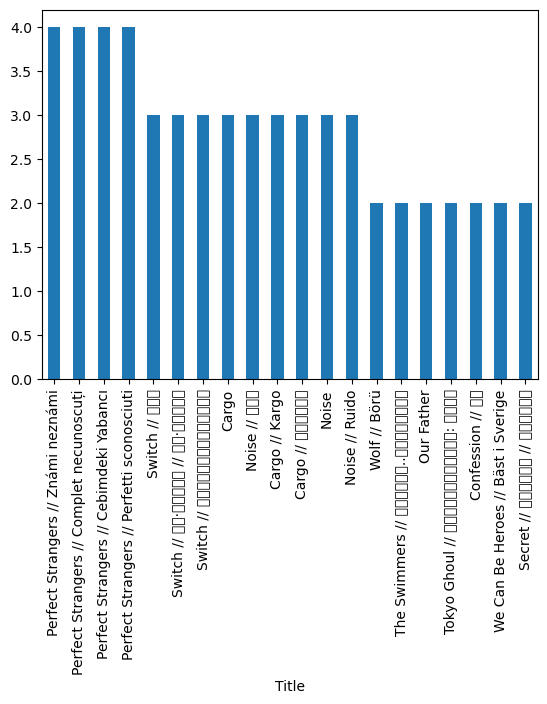

In [45]:
data['Title'].value_counts()[:20].plot(kind='bar')
# sns.countplot(data['Title'])

In [38]:
data['Genre'].value_counts()

Genre
['Comedy']                              1560
['Short']                                905
['Documentary']                          810
['Drama']                                630
['Animation', 'Action', 'Adventure']     570
                                        ... 
['Adventure', 'Drama', 'Western']          5
['Comedy', 'Horror', 'Thriller']           5
Genre                                      4
Comedy, Drama,Romance                      1
Biography, Drama, History                  1
Name: count, Length: 394, dtype: int64

<Axes: xlabel='Genre'>

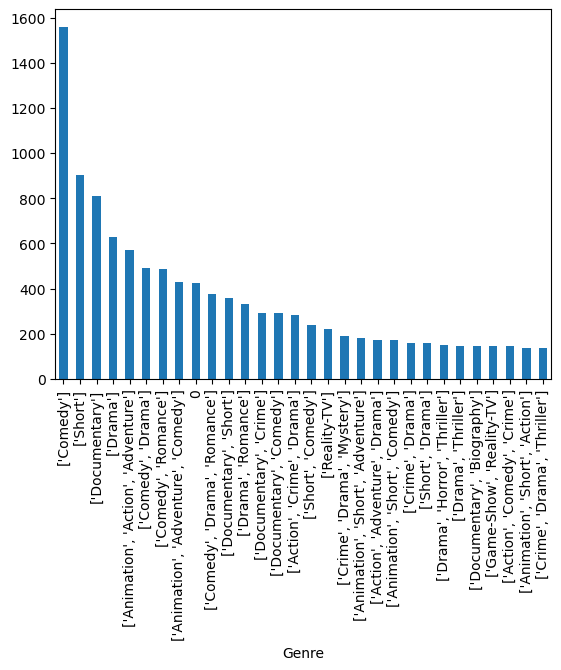

In [44]:
data['Genre'].value_counts()[:30].plot(kind='bar')

# other analysis dataset..

In [19]:
#missing null values.
data.isnull().sum()

Title                  0
Available Globally?    0
Release Date           0
Hours Viewed           0
Number of Ratings      0
Rating                 0
Genre                  0
Key Words              0
dtype: int64

In [108]:
#write of unique value of catagerical columan
data.nunique()

Title                  18214
Available Globally?        2
Release Date            1667
Hours Viewed             587
Number of Ratings       2267
Rating                    82
Genre                    394
Key Words               2337
dtype: int64

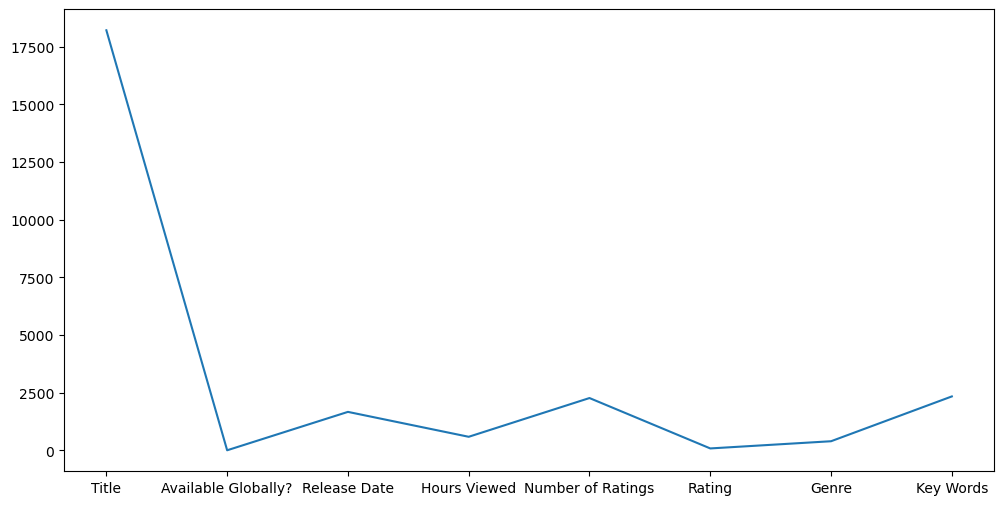

In [109]:
s=data.nunique()
plt.plot(s)

In [105]:
data.groupby('Number of Ratings')['Hours Viewed'].corr()

TypeError: SeriesGroupBy.corr() missing 1 required positional argument: 'other'

In [106]:
# Particular date are total movies releses.
data[data['Release Date']=='2023-03-23']

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme..."
623,Grey's Anatomy: Season 11,No,2023-03-23,19700000,337.0,5.6,['Drama'],"sequel,second part,love,life,couple"
1046,Alexa & Katie: Part 1,Yes,2023-03-23,10700000,1062.0,6.5,"['Comedy', 'Romance']","19th century,1890s,new york state,new york,gre..."
4880,Replicas,No,2023-03-23,812100000,1785.0,7.1,"['Animation', 'Short', 'Comedy']","intruder,executive,losing a job,berserk,jealousy"
5503,Stuck with You // Happy Nous Year,Yes,2023-03-23,19700000,2138.0,5.4,"['Action', 'Adventure', 'Sci-Fi']","godzilla,robot sci fi,giant monster sci fi,seq..."
5926,Fast & Furious Spy Racers: Season 4: Mexico,Yes,2023-03-23,10700000,1723.0,6.7,"['Documentary', 'Music']","musician,psychedelic rock"
9760,Satria Dewa: Gatotkaca,No,2023-03-23,812100000,1520.0,6.4,"['Animation', 'Short', 'Comedy']","dystopia,rebellion,revolution,brainwashing,exe..."
10383,Russell Howard: Lubricant: Limited Series,Yes,2023-03-23,19700000,387.0,6.4,"['Short', 'Drama']","san francisco california,california,advertisin..."
10806,Eyeshield 21: Tokyo Tournament (Spring) -Death...,No,2023-03-23,10700000,3849.0,8.4,"['Short', 'Drama', 'War']","musical number,vitaphone melody master,dance n..."


In [23]:
# particular date are minimum are value in movie
data[data['Release Date']=='2023-03-23'].min()

Title                                              Alexa & Katie: Part 1
Available Globally?                                                   No
Release Date                                                  2023-03-23
Hours Viewed                                                    10700000
Number of Ratings                                                 1062.0
Rating                                                               5.4
Genre                                          Biography, Drama, History
Key Words              19th century,1890s,new york state,new york,gre...
dtype: object

In [24]:
# particular date are maximum are value in movie
data[data['Release Date']=='2023-03-23'].max()

Title                            The Night Agent: Season 1
Available Globally?                                    Yes
Release Date                                    2023-03-23
Hours Viewed                                     812100000
Number of Ratings                                   7696.0
Rating                                                 8.4
Genre                                   ['Short', 'Drama']
Key Words              sequel,second part,love,life,couple
dtype: object

In [25]:
# date are max.rating in 1 day
data[data['Release Date'] == '2023-03-23']['Rating'].max()

'8.4'

In [26]:
data['Hours Viewed'].value_counts().max()

3693

In [34]:
# there are in genre in comedy,'Animation', 'Short',
# data.groupby('Genre')['Biography', 'Drama', 'History',['Comedy', 'Romance']].max()
filtered_data = data[(data['Genre'] == 'Comedy') & ((data['Genre'] == 'Animation') | (data['Genre'] == 'Short'))]
print(filtered_data.head())

Empty DataFrame
Columns: [Title, Available Globally?, Release Date, Hours Viewed, Number of Ratings, Rating, Genre, Key Words]
Index: []


In [37]:
# What is the title of the person with the following Number of Ratings 1723.0 

In [40]:
# rat = 1723.0

p = data[data['Number of Ratings'] == 1723.0]['Title']

print(p)


Series([], Name: Title, dtype: object)


In [35]:
data.groupby('Release Date')['Rating']

In [36]:
data

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme..."
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot..."
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation..."
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal..."
...,...,...,...,...,...,...,...,...
18327,راس السنة,No,0,0,0,0,0,0
18328,心が叫びたがってるんだ。,No,0,0,0,0,0,0
18329,두근두근 내 인생,No,0,0,0,0,0,0
18330,라디오 스타,No,0,0,0,0,0,0


In [ ]:
#what are keyword in holidays,lesbian relation are in title name.

In [51]:
#which of the hour viwed in maximum number movies.
data['Hours Viewed'].value_counts().idxmax()

'0'

In [54]:
#how are you total movies in inculde for Biography or Drama, History.
inculde = ['Biography', 'Drama', 'History']
data[data['Genre'].isin(inculde)].shape[0]

0

In [104]:
#these date are  between in 2022-12-30	2023-03-23 total movies relase and write the Release Date.
start='2022-12-30'
end='2023-03-23'

data.groupby('Title')['Release Date'].value_counts()

Title                                       Release Date
#Alive // #살아있다                             2018-08-24      1
#AnneFrank - Parallel Stories               2021-08-27      1
#AtFirstSight // #Sohavégetnemérös          2019-10-18      1
#FriendButMarried // #TemanTapiMenikah      2022-05-04      1
#FriendButMarried 2 // #TemanTapiMenikah 2  2021-11-25      1
                                                           ..
레드슈즈                                        2021-05-05      1
비상선언                                        2020-04-06      1
선생 김봉두                                      0               1
침묵                                          2022-05-04      1
표적                                          2018-09-28      1
Name: count, Length: 18299, dtype: int64

In [ ]:
#how many total movies in Available Globally Release ?

In [ ]:
# write the movies name of minimum 5 rating are present?

In [89]:
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['figure.dpi']=100

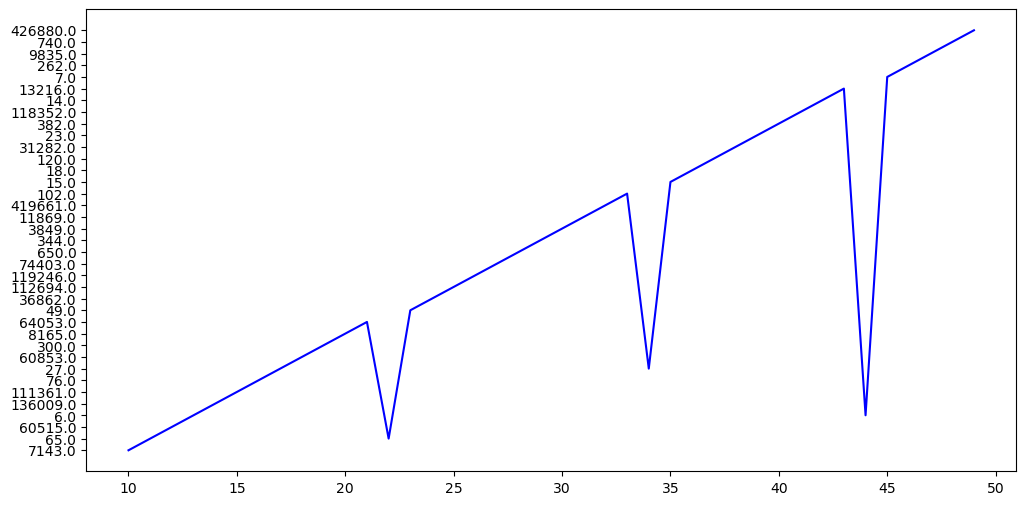

In [90]:
# Visualizing the data with graph
plt.plot(data['Number of Ratings'][10:50],color='blue')
plt.show()

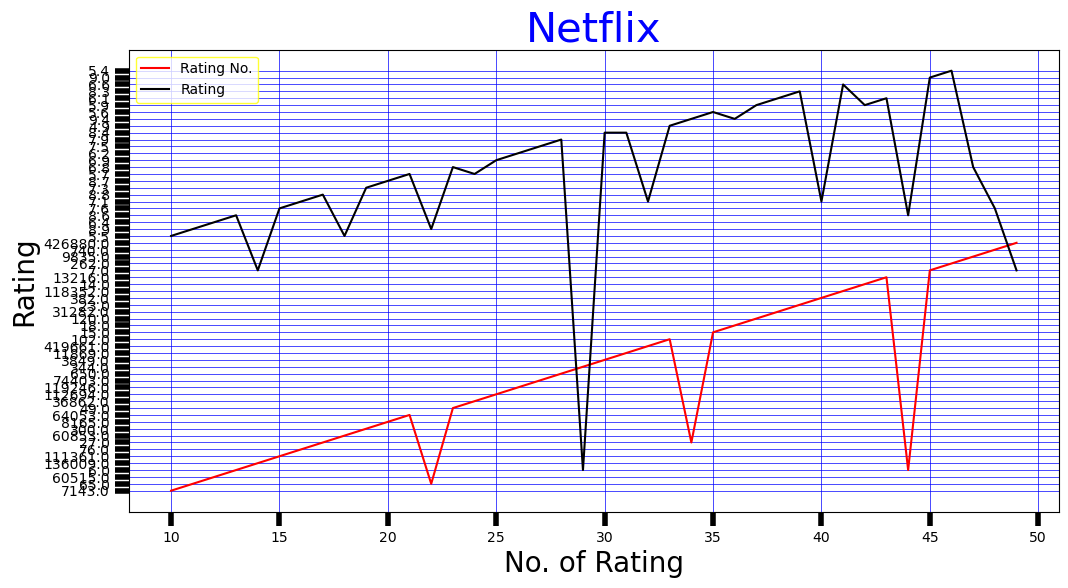

In [91]:
plt.plot(data['Number of Ratings'][10:50],'red',label='Rating No.')
plt.plot(data['Rating'][10:50],'black',label='Rating')
plt.xlabel('No. of Rating',size=20)
plt.ylabel('Rating',size=20)
plt.title('Netflix',size=30,color='b')
plt.grid(color = 'b', linestyle = '-', linewidth = 0.5)
plt.tick_params(labelcolor='black',labelsize=10,color='black',size=10,width=4)
plt.legend(edgecolor='yellow')

C:\Users\dell\AppData\Local\Temp\ipykernel_16064\231526169.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Available Globally?'],data['Hours Viewed'], cmap='viridis')


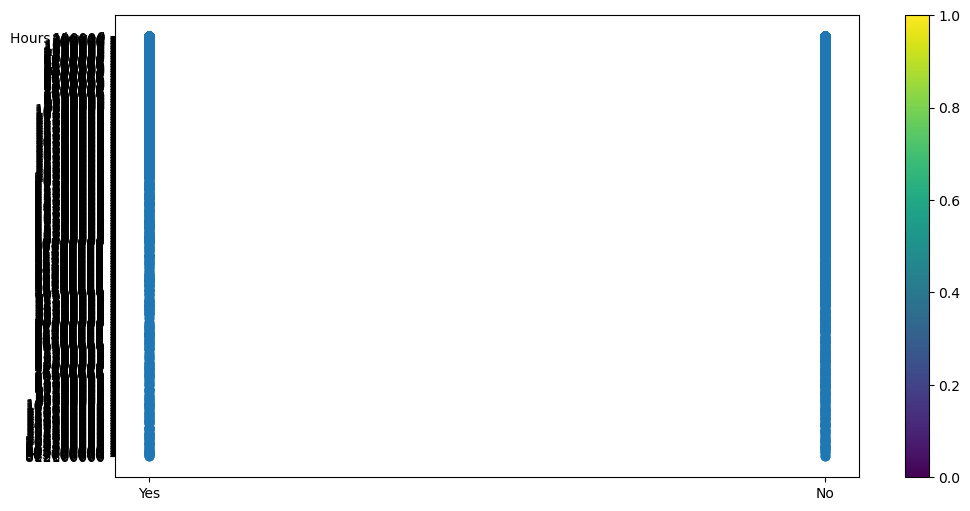

In [100]:
#color=data['Genre'].map({'Comedy':'red','Short':'black','Documentary':'pink','Drama':'blue'})
plt.scatter(data['Available Globally?'],data['Hours Viewed'], cmap='viridis')


plt.colorbar()
plt.show()
# plt.scatter(tip['total_bill'],tip['tip'],color='b')

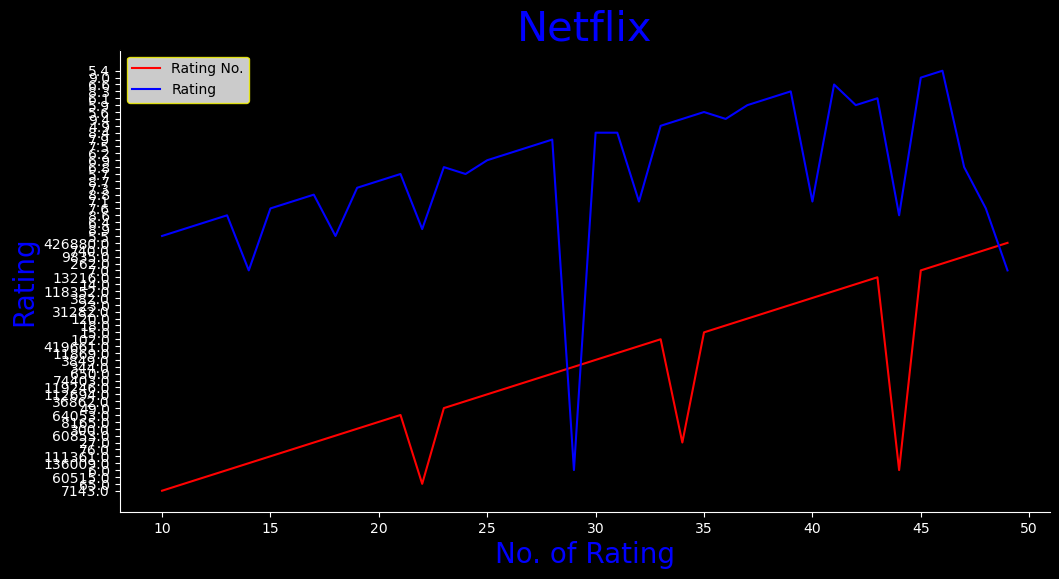

In [96]:

plt.figure(facecolor='black')
ax=plt.gca()
ax.set_facecolor('black')
plt.tick_params(labelcolor='white',color='white')
for sp in ['left','bottom']:
    ax.spines[sp].set_color('white')
plt.plot(data['Number of Ratings'][10:50],'red',label='Rating No.')
plt.plot(data['Rating'][10:50],'blue',label='Rating')
plt.xlabel('No. of Rating',size=20,color='b')
plt.ylabel('Rating',size=20,color='b')
plt.title('Netflix',size=30,color='b')
#plt.tick_params(labelcolor='black',labelsize=10,color='black',size=10,width=4)
plt.legend(edgecolor='yellow')


# plt.figure(facecolor='black')
# ax=plt.gca()
# ax.set_facecolor('black')
# plt.tick_params(labelcolor='white',color='white')
# for sp in ['left','bottom']:
#     ax.spines[sp].set_color('white')

In [94]:
data['Genre'].value_counts()

Genre
['Comedy']                              1560
['Short']                                905
['Documentary']                          810
['Drama']                                630
['Animation', 'Action', 'Adventure']     570
                                        ... 
['Adventure', 'Drama', 'Western']          5
['Comedy', 'Horror', 'Thriller']           5
Genre                                      4
Comedy, Drama,Romance                      1
Biography, Drama, History                  1
Name: count, Length: 394, dtype: int64

In [46]:
a

0        6.0
1        5.7
2        8.4
3        7.4
4        6.6
        ... 
18327      0
18328      0
18329      0
18330      0
18331      0
Name: Rating, Length: 18332, dtype: object

In [47]:
type(a[0])

str

In [48]:
a[0]

'6.0'

In [49]:
a

0        6.0
1        5.7
2        8.4
3        7.4
4        6.6
        ... 
18327      0
18328      0
18329      0
18330      0
18331      0
Name: Rating, Length: 18332, dtype: object

In [ ]:
# for i in range(0,len(a)):
#     a[i]=float(a[i])
# x=lambda i:int(i)
# list(map(x,a))

In [ ]:
data.head()

In [ ]:
a=list(data['Genre'].values.flatten())

In [ ]:
a[0]

In [ ]:
a[0].split(',')[1]

In [80]:
a = 0.2
b = 0.1 
c = 0.6 
print(a+b == c)

False
